In [169]:
# -*- coding: utf-8 -*-
# 导入相关依赖
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

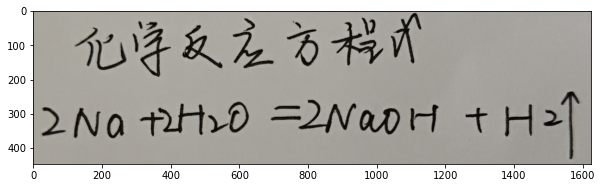

In [170]:
# 定义相关路径
# root_path = 'C:\\Users\\59236\\code\\split\\'
root_path = './'
img_file = 'test_data_3.png'
img_path = root_path + img_file

# 使用matplot加载图片进行预览
img = plt.imread(root_path+img_file)
plt.imshow(img)
plt.show()

In [171]:
# opencv读取图片
img = cv2.imread(img_path)
# cv2.imshow('Source Image', img)
# cv2.waitKey(0)

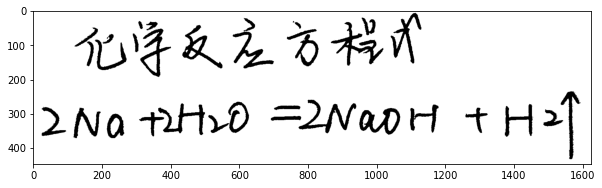

In [172]:
# 转化为二值图像
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
# cv2.imshow("Binary Image", img_binary)
# cv2.waitKey(0)
plt.imshow(img_binary, "gray")
plt.show()

Otsu threshold: 98.0


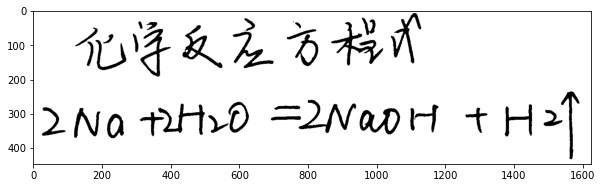

In [173]:
# 去噪后进行Otsu二值化
blur = cv2.GaussianBlur(img_gray, (3,3), 0)
otsuThreshold, img_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# cv2.imshow("Binary Adaptive Image", img_otsu)
# cv2.waitKey(0)
print("Otsu threshold: " + str(otsuThreshold))
plt.imshow(img_otsu, "gray")
plt.show()

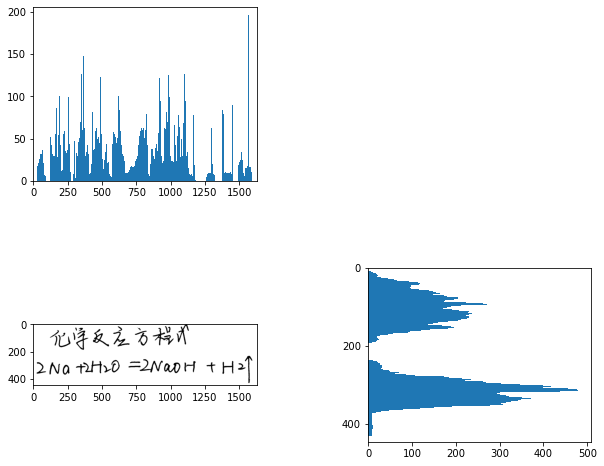

In [174]:
from collections import Counter

rows = img_otsu.shape[0]
cols = img_otsu.shape[1]
# pixel_col_count = [0 for i in range(cols)] # 每一列像素(255)的数量
# pixel_row_count = [0 for i in range(rows)] # 每一行像素(255)的数量

def getColCount(img, cols):
    res = [0 for i in range(cols)]
    # 按列统计
    for col in range(cols):
        cnt = Counter(img[:,col]).get(0)
        if cnt is None:
            res[col] = 0
        else:
            res[col] = cnt
    return res

def getRowCount(img, rows):
    res = [0 for i in range(rows)]
    # 按行统计
    for row in range(rows):
        cnt = Counter(img[row, :]).get(0)
        if cnt is None:
            res[row] = 0
        else:
            res[row] = cnt
    return res;

pixel_col_count = getColCount(img_otsu, cols)
pixel_row_count = getRowCount(img_otsu, rows)

plt.rcParams['figure.figsize'] = (10.0, 8.0)

grid = plt.GridSpec(2, 2, wspace=0.5, hspace=0.5)

# 原图片
main_ax = plt.subplot(grid[1,0])
plt.imshow(img_otsu, "gray")

# 绘制柱状图
# 像素列状分布
col_ax = plt.subplot(grid[0,0], sharex=main_ax)
#plt.xlim(0, len(pixel_col_count))
plt.bar(range(len(pixel_col_count)), pixel_col_count, width=1)

# 行分布
row_ax = plt.subplot(grid[1,1], sharey=main_ax)
#plt.ylim(len(pixel_row_count), 0)
plt.barh(range(len(pixel_row_count)), pixel_row_count, height=1)

plt.show()

In [175]:
# 段-类，from从，to到
class Segment:
    def __init__(self, _from, _to):
        self.start = _from
        self.end = _to
    
    def __str__(self):
        return "(%d, %d)" %(self.start, self.end)
    
    def getStart(self):
        return self.start
    
    def getEnd(self):
        return self.end

# 按照水平分行，TODO: 给第一行添加全0？
def getSegment(pixels):
    res = []
    flag = False
    start = 0
    end = 0
    threshold = 1
    
    for pos, pixel in enumerate(pixels):
        if pixel >= threshold:  # 若此处密度大于阈值
            if flag == False:
                start = pos
            end = pos  # 更新当前数值
            flag = True  # 标志位表示当前正在某一行中
        else:  # 此处密度小于阈值
            if flag == True:  # 表示当前一段行数的确定
                res.append(Segment(start, end))
                flag = False;
            else: # 没有检测到行
                start = pos
    
    # 处理最后一个
    if flag == True:
        res.append(Segment(start, end))
            
    return res


In [176]:
# Test 
test_data = [1, 1, 0, 45, 3]
test_lines = getSegment(test_data)

for seg in test_lines:
    print(seg)

(0, 1)
(3, 4)


截取：y轴-(9, 192), x轴-(0, 1625).
截取：y轴-(236, 431), x轴-(0, 1625).


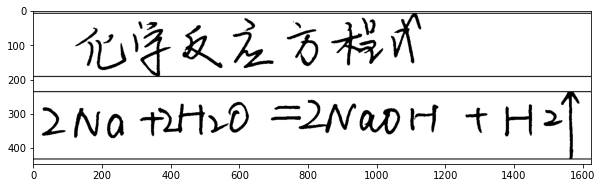

In [177]:
# 获取图像的行
lines = getSegment(pixel_row_count)
img_copy = img_otsu.copy()
splitLines = []

for seg in lines:
    ptStart1 = (0, seg.getStart())
    ptEnd1 = (cols-1, seg.getStart())
    ptStart2 = (0, seg.getEnd())
    ptEnd2 = (cols-1, seg.getEnd())
    print("截取：y轴-(%d, %d), x轴-(%d, %d)." %(ptStart1[1], ptStart2[1], 0, cols-1))
    splitLines.append(img_otsu[ptStart1[1]:ptStart2[1], 0:cols-1])
    
    cv2.line(img_copy, ptStart1, ptEnd1, (0,0,0), 2, 1)
    cv2.line(img_copy, ptStart2, ptEnd2, (0,0,0), 2, 1)
     
plt.imshow(img_copy, "gray")
plt.show()

2
(183, 1625)
(195, 1625)


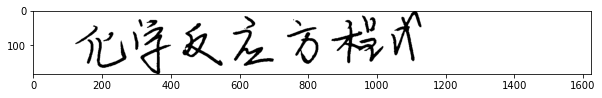

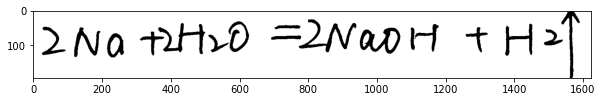

In [178]:
print(len(splitLines))

for i, split_img in enumerate(splitLines):
    plt.figure(i)
    plt.imshow(split_img, "gray")
    print(split_img.shape)
    
plt.show()

Start:(123, 0), End:(271, 182)
Start:(291, 0), End:(401, 182)
Start:(435, 0), End:(551, 182)
Start:(582, 0), End:(700, 182)
Start:(740, 0), End:(830, 182)
Start:(869, 0), End:(1020, 182)
Start:(1043, 0), End:(1130, 182)
------
Start:(26, 0), End:(94, 194)
Start:(120, 0), End:(195, 194)
Start:(216, 0), End:(264, 194)
Start:(311, 0), End:(500, 194)
Start:(511, 0), End:(628, 194)
Start:(693, 0), End:(941, 194)
Start:(952, 0), End:(1069, 194)
Start:(1099, 0), End:(1181, 194)
Start:(1260, 0), End:(1323, 194)
Start:(1375, 0), End:(1454, 194)
Start:(1488, 0), End:(1591, 194)
------


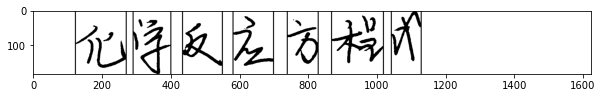

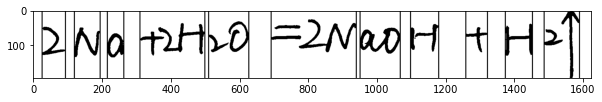

In [179]:
# 对每一行进行分割
characters = []
for i, split_img in enumerate(splitLines):
    line_c = []
    split_col_count = getColCount(split_img, split_img.shape[1])
    segs = getSegment(split_col_count)
    
    seg_copy = split_img.copy()
    plt.figure(i)
    
    for j, seg in enumerate(segs):
        # print(seg)
        ptStart1 = (seg.getStart(), 0)
        ptEnd1 = (seg.getStart(), split_img.shape[0]-1)
        ptStart2 = (seg.getEnd(), 0)
        ptEnd2 = (seg.getEnd(), split_img.shape[0]-1)
        print("Start:(%d, %d), End:(%d, %d)" %(seg.getStart(), 0, seg.getEnd(), split_img.shape[0]-1))
        line_c.append(split_img[ptStart1[1]:ptEnd1[1], ptStart1[0]:ptStart2[0]])
        
        cv2.line(seg_copy, ptStart1, ptEnd1, (0,0,0), 2, 1)
        cv2.line(seg_copy, ptStart2, ptEnd2, (0,0,0), 2, 1)
    
    plt.imshow(seg_copy, "gray")
        
    characters.append(line_c)
    print("------") 

plt.show()

plot size: (2, 11)


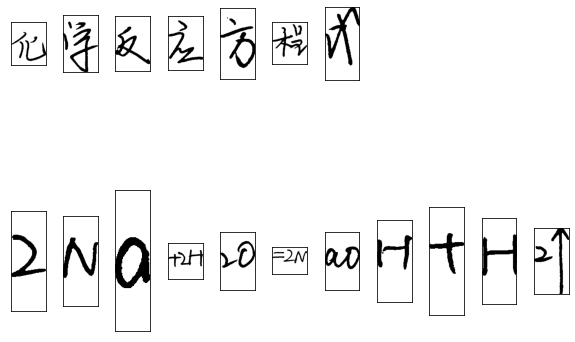

In [180]:
plot_row = len(characters)
plot_col = 0
for i, cline in enumerate(characters):
    if len(cline) > plot_col:
        plot_col = len(cline)
        
print("plot size: (%d, %d)" %(plot_row, plot_col))
grid = plt.GridSpec(plot_row, plot_col, wspace=0.5, hspace=0)

for i, cline in enumerate(characters):
    for j, cimg in enumerate(cline):
        plt.subplot(grid[i,j])
        plt.xticks([])  #去掉x轴
        plt.yticks([])  #去掉y轴
        # plt.axis('off')  #去掉坐标轴
        plt.imshow(cimg, "gray")
        

plt.show()